# Fraudulent Claims Analysis
This analysis aims to answer research question 2, prediction of risk class. Every policyholder has a risk class that determines whether the individual can/should be insured and how much should be charged as premiums. The risk level is determined by the various factors provided by the insured. An individual with multiple arrest from driving under the influence of alcohol will have a lower risk of damaging a vehicle than someone with no charges, hence the premiums will the higher for the first person than the second. Machine learning models can learn from the data provided and accurately determine the risk class of the individual. Clustering alogrithm also help determine certain similarities in data that the human cannot or would find difficulty finding. Given the aim of gathering policyholder information is to determine the risk level, a clustering algorithm can be used to group the individuals. Analysis by an insurance expert will then be used to determine the premiums that should be charged for each cluster/group. 
This analysis is divided into 2 part, clustering of the policyholders and prediction of their risk classes.
5 sections will be covers in this analysis:
1. Data Importing and Inspection
2. Data Preprocessing
3. Feature Engineering
4. Data clustering
5. Model Building and Evaluation

At the end of this task, the models will be analysed to examine whether machine learning models can be used to predict the risk level and the cluster of the data. 

## Section 1: Data Importing and Inspection

### Importing the important libraries

In [1]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")

# for data importing and manipulation
import pandas as pd
import random

# for data array and matrix manipulation
import numpy as np  

# for plotting data
import matplotlib.pyplot as plt
import seaborn as sns

# for encoding and standizing the data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# to handle imbalanced data
from imblearn.over_sampling import SMOTE

# to split the dataset into train and test set
from sklearn.model_selection import train_test_split

# for performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# models to be trained
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import lightgbm as lgb
from xgboost import XGBClassifier

# for model evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import  silhouette_score

import statistics as sta

pd.set_option('display.max_columns', None)



### Reading the data
The insurance data is in a csv format and imported using tha __read_csv__ function from the __pandas__ library. 

In [2]:
# reading the csv file
df = pd.read_csv('train.csv')

# dropping the ID column since it is of no use
df.drop('Id', axis = 1, inplace = True)
df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.00000,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.00000,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.00000,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.00000,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.00000,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,.

In [3]:
# printing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


In [4]:
# printing the dscription of the dataset of the column with the type "object"
df.describe(include = ["object"])

,Product_Info_2
count,59381
unique,19
top,D3
freq,14321


A quick glance at the data shows a large number of missing values in certain columns. These columns will have to analysed and an appropriate method will be selected to deal with them. Also some of the columns have already been standardized such as Age, Height, Weight, etc.

## Section 2: Data Preprocessing
In this section it is ensured that the data contains no unwanted noise, such as null values, wrong data types, and invalid data values. 

### Finding the count of missing values

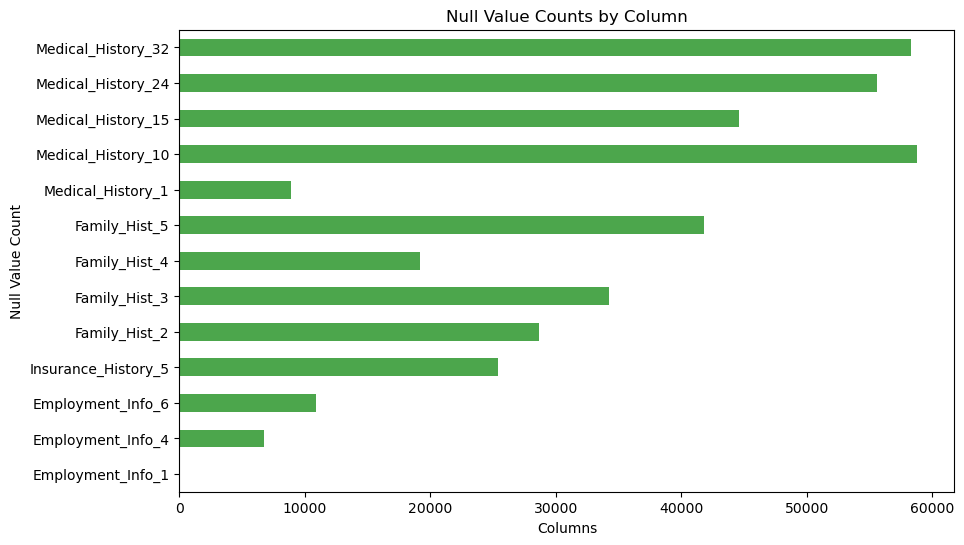

In [5]:
# finding all the null values in the dataset
null_counts = df.isnull().sum()
columns_with_null = null_counts[null_counts > 0]

# Create a bar plot for columns with null values
plt.figure(figsize=(10, 6))
columns_with_null.plot(kind='barh', color='green', alpha=0.7)
plt.title('Null Value Counts by Column')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.xticks(rotation=0)
plt.show()


In [6]:
# getting percentage description of the columns with null values
missing_value_cols = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print('Column ', i, 'has:', str(round((df[i].isnull().sum()/df.shape[0])*100, 2)),'% (',str(df[i].isnull().sum()),') missing values')
        missing_value_cols.append(i)

# printing the columns with the null values
print('\n Columns with missing values:\n',missing_value_cols)

Column  Employment_Info_1 has: 0.03 % ( 19 ) missing values
Column  Employment_Info_4 has: 11.42 % ( 6779 ) missing values
Column  Employment_Info_6 has: 18.28 % ( 10854 ) missing values
Column  Insurance_History_5 has: 42.77 % ( 25396 ) missing values
Column  Family_Hist_2 has: 48.26 % ( 28656 ) missing values
Column  Family_Hist_3 has: 57.66 % ( 34241 ) missing values
Column  Family_Hist_4 has: 32.31 % ( 19184 ) missing values
Column  Family_Hist_5 has: 70.41 % ( 41811 ) missing values
Column  Medical_History_1 has: 14.97 % ( 8889 ) missing values
Column  Medical_History_10 has: 99.06 % ( 58824 ) missing values
Column  Medical_History_15 has: 75.1 % ( 44596 ) missing values
Column  Medical_History_24 has: 93.6 % ( 55580 ) missing values
Column  Medical_History_32 has: 98.14 % ( 58274 ) missing values

 Columns with missing values:
 ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',

Columns with more than __40%__ missing values will be dropped. For the other columns the missing values will be replaced by the __mean of the columns__. Since the missing columns does not include product_info_2, there is no need to worry about the data type of the column. 

### Dropping columns with missing values greater than 40% of the total records

In [7]:
# creating a loop to replace the null values
for i in missing_value_cols:
    if (df[i].isnull().sum()/df.shape[0])*100 >40.0:
        df.drop(i, axis = 1, inplace=True)
    else:
        col_mean = df[i].mean()
        df[i].fillna(col_mean, inplace=True)

## Section 3: Feature Engineering

This section deals with transforming the features of the data to suit the task at hand. This section involved:
1. Standardizing the numerical columns
2. Encoding the categorical columns
3. Upsampling to ensure the different classes of the target variable have the same count.



### Finding the best method for encoding the oject column

In [8]:
# printing the distinct target values and their counts
print(df['Product_Info_2'].value_counts(), '\n\nThere are',len(df['Product_Info_2'].value_counts()), 'unique values in the column')

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64 

There are 19 unique values in the column


Since there are 19 unique values and no inherent order to them, the __binary encoder__ will be used.

In [9]:
# Initialize the BinaryEncoder
encoder = ce.BinaryEncoder(cols=['Product_Info_2'])

# Fit and transform the encoder on your data
df_enc = encoder.fit_transform(df)

In [10]:
# checking if the object columns have been encoded
df_enc

,Product_Info_1,Product_Info_2_0,Product_Info_2_1,Product_Info_2_2,Product_Info_2_3,Product_Info_2_4,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,0,0,0,0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.000000,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.000000,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,0,0,0,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.000000,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.000000,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,1,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.000000,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.000000,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,1,0,0,1,0,0,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.000000,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.000000,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,1,0,0,1,0,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.000000,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,7.962172,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Although some of the columns look standardized it would be best to scale the whole table except the target column, __Response__.

### Scaling the numerical colum

In [11]:
# initiatiing the Scaler Object
scaler = StandardScaler()

# fitting and transforming the dataset
df_scaled = scaler.fit_transform(df_enc.drop('Response', axis = 1))

In [12]:
# creating a new dataset with the scaled values
df = pd.DataFrame(df_scaled, columns = df_enc.drop('Response', axis = 1).columns)
df = pd.concat([df, df_enc['Response']], axis = 1)

In [13]:
# The final dataset
df

,Product_Info_1,Product_Info_2_0,Product_Info_2_1,Product_Info_2_2,Product_Info_2_3,Product_Info_2_4,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,-0.164525,-0.111564,-0.540176,-0.954472,-0.674423,1.018613,-2.841731,-0.891949,-0.083689,-2.264385,-0.149284,1.197962,-1.690031,-1.617886,-1.198363,-0.602215,0.794450,-0.420829,-2.034133e-01,2.448480,1.370252e-14,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,-1.634368,-0.169414,0.862391,-1.013721,-0.928723,-1.388458,-0.822964,-1.420309,2.433713e-13,-0.329824,-0.794913,-0.337091,-1.377491,-0.085709,0.241387,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.362135,0.159109,2.259754,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.555706,-0.480107,0.485769,0.100114,-0.26821,0.544473,-0.20581,0.086178,-3.039135,0.429066,-0.0322,-0.434938,0.256066,-0.069812,0.304099,0.128359,1.455973,-0.209383,-0.094989,-0.22766,-0.121511,-0.093259,-0.112948,-0.11877,-0.102552,-0.081832,-0.194523,-0.24817,-0.10052,-0.077442,-0.088936,-0.485054,-0.113482,-0.096156,-0.086894,-0.096867,-0.090557,-0.121725,-0.196473,-0.329198,-0.138776,-0.31344,-0.116712,-0.109535,-0.123142,-0.109062,-0.160265,-0.104956,-0.147058,-0.15287,-0.145195,-0.083587,-0.102552,-0.267090,-0.082972,-0.117672,-0.245752,-0.100776,-0.218424,-0.10405,-0.087091,-0.117819,-0.092521,-0.142512,-0.240076,8
1,-0.164525,-0.111564,-0.540176,-0.954472,1.482749,-0.981727,0.312319,-0.891949,-0.083689,0.441621,-0.149284,-1.753982,-1.445119,-1.805858,-1.613382,-0.942298,-1.807840,2.376264,-2.034133e-01,-0.408417,-1.138226e+00,-0.500858,-0.0865,0.061379,0.362834,-0.117377,1.201609,-0.140157,0.611857,-0.169414,0.862391,-1.013721,-0.928723,1.260049,-0.822964,-1.420309,-2.687054e+00,-0.246581,0.884633,-0.337091,-1.377491,-0.085709,0.241387,-0.071228,-0.151323,-1.828718,0.064649,-0.244864,0.362135,0.159109,-0.442540,0.149843,-0.237045,-0.188428,0.122931,-0.349505,0.136745,0.555706,-0.480107,0.485769,0.100114,-0.26821,0.544473,-0.20581,0.0

## Section 4: Clustering the Data
This section focuses on grouping the data into classes. The K-means algorithm is used since all the entries need to be classified without creating outliers. 

In [14]:
# Set a random seed for reproducibility
random.seed(42)

# Randomly select 5000 rows from the dataframe
df_att_1 = df.sample(n=10000)

df_att = df_att_1.drop('Response', axis = 1)

In [15]:
# Choose the number of clusters (K) and train the K-Means model
k = 5  # You can adjust K based on your needs
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_att)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

In [16]:
# printing the dataset clusters
initial_clusters = pd.DataFrame(cluster_labels)
initial_clusters.head(10)

,0
0,4
1,4
2,1
3,1
4,4
5,2
6,4
7,4
8,1
9,1


## Testing using various values of K using the Silhouette and Elbow methods

The silhouette method measures how similar an object is to its own cluster compared to other clusters. It provides a silhouette score for each data point. The silhouette score ranges from -1 to 1, with high values indicating that the object is well matched to its own cluster and poorly matched to neighboring clusters.

The elbow method focuses on finding the point where the within-cluster sum of squares (WCSS) begins to form an "elbow" in the plot.WCSS quantifies the variability within each cluster. When you increase the number of clusters WCSS typically decreases due, to the fact that data points become closer, to their cluster centroids. However, beyond a certain point, the reduction in WCSS value becomes marginal.

In [17]:
inertia = {}
silhouette = {}

for k in range(2, 20):
    # creating a cluster object with 4 clusters
    kmeans = KMeans(n_clusters=k)
    
    # fitting the clusters on the data
    kmeans.fit(df_att)
    
    inertia[k] = kmeans.inertia_
    
    silhouette_avg = silhouette_score(df_att, kmeans.predict(df_att))
    silhouette[k] = silhouette_avg

## Graphing the two Metrics

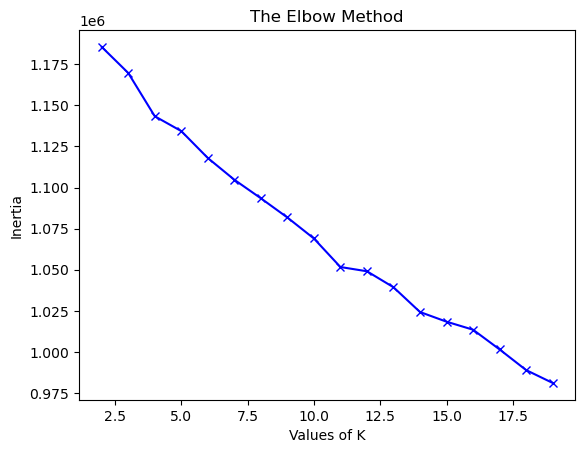

In [18]:
# plotting a graph to show the inertia values at various valus of k
plt.plot(inertia.keys(), inertia.values(), 'bx-')

plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

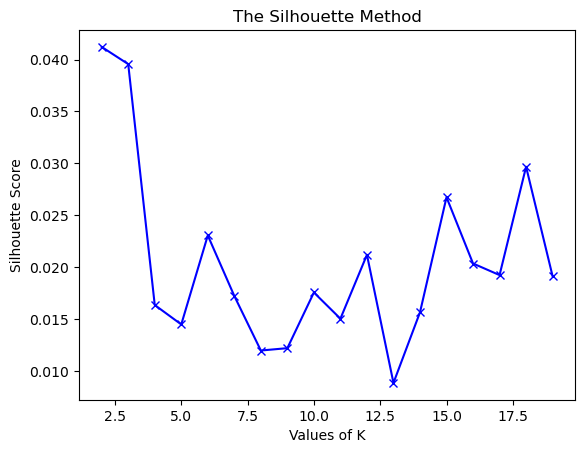

In [19]:
# plotting a graph to show the inertia values at various valus of k
plt.plot(silhouette.keys(), silhouette.values(), 'bx-')

plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method')
plt.show()

The graph of the Silhouette values show the best number of cluster that can effectively group the entries is __18__. 

__Note: Further increasiing of the range of K values showed varying K values.__

## Reclustering with K = 18

In [20]:
# Choose the number of clusters (K) and train the K-Means model
k = 18  # You can adjust K based on your needs
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_att)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_


In [21]:
# adding the cluster labels as a column in the data
df_att['Cluster'] = cluster_labels
df_att['Response'] = df_att_1['Response'].astype('int32')

In [22]:
# checking if the data types are correct
df_att.dtypes

Product_Info_1        float64
Product_Info_2_0      float64
Product_Info_2_1      float64
Product_Info_2_2      float64
Product_Info_2_3      float64
                       ...   
Medical_Keyword_46    float64
Medical_Keyword_47    float64
Medical_Keyword_48    float64
Cluster                 int32
Response                int32
Length: 124, dtype: object

#### Displaying the frequency distributions of response and cluster classes

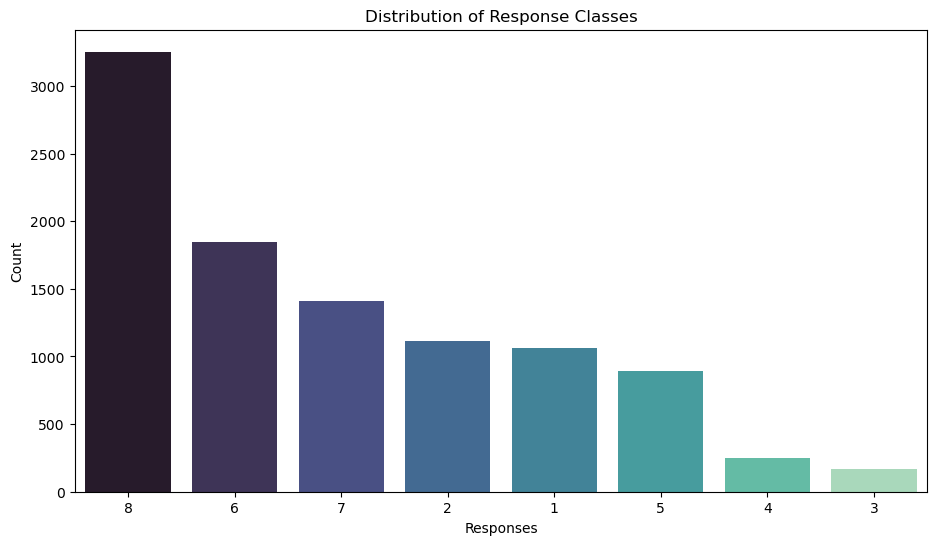

In [23]:
# Plot the distribution of the 'Response' column
plt.figure(figsize=(11, 6))
sns.countplot(data=df_att, x='Response', order=df_att['Response'].value_counts().index, palette='mako')
plt.title('Distribution of Response Classes')
plt.ylabel('Count')
plt.xlabel('Responses')
plt.show()

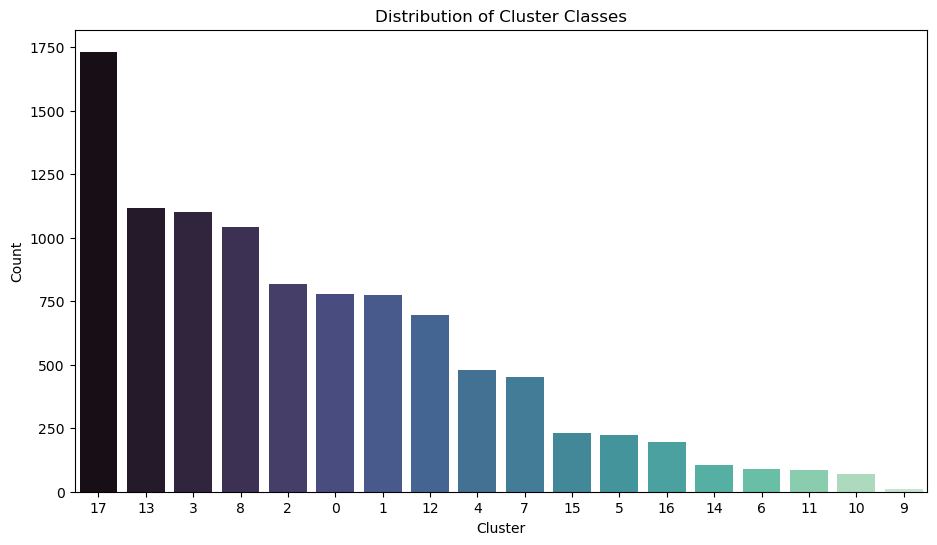

In [24]:
# Plot the distribution of the 'Response' column
plt.figure(figsize=(11, 6))
sns.countplot(data=df_att, x='Cluster', order=df_att['Cluster'].value_counts().index, palette='mako')
plt.title('Distribution of Cluster Classes')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.show()

The response and cluster classes show a similar didstribution but different scales

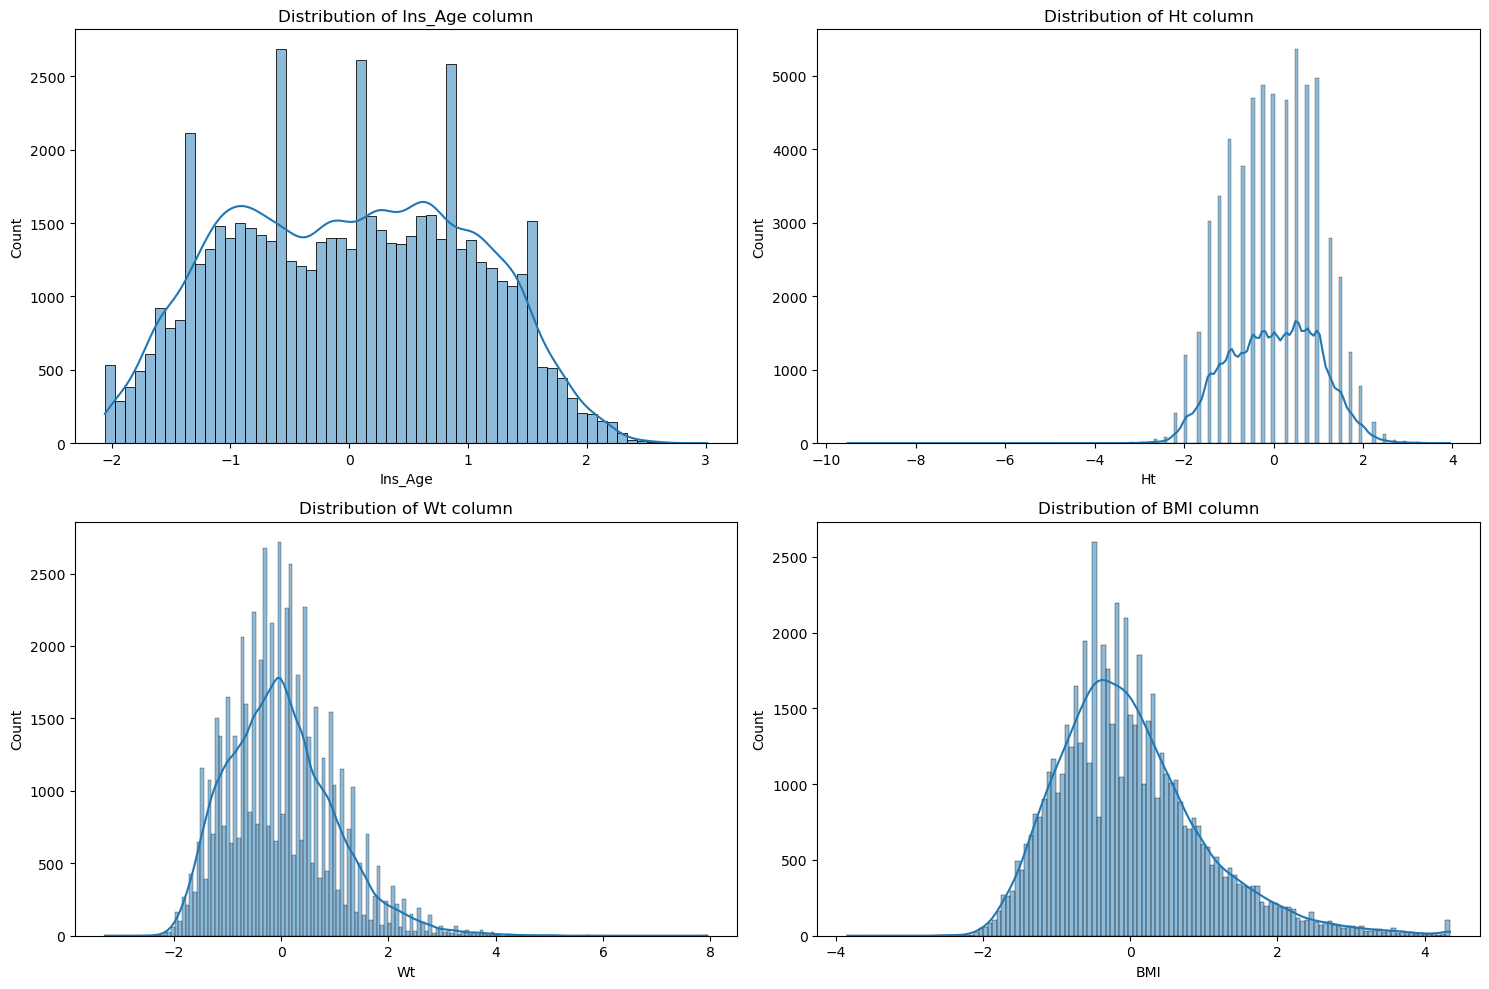

In [25]:
# Plotting histograms for the specified columns
interest_columns = ['Ins_Age', 'Ht', 'Wt', 'BMI']

plt.figure(figsize=(15, 10))

for idx, col in enumerate(interest_columns, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col} column')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Splitting the data into train and test set

Before beginning these processes, the data is split into train and test set to prevent data leakage. The data predictors are first assigned to x_data and the target variable is assigned to y_data. These two datasets are then split using the sklearn's __train_test_split__ using a test_size of _33%_. 

This will randomly assign _33%_ of the values to the __testset__ and _67%_ of the values to the __trainset__.

In [26]:
# splitting the trainset into dependent and independent sets. The Cluster column is the value to be predicted and including the initial response column as a predictor
x_data = df_att.drop(['Cluster'], axis=1)
y_data = df_att['Cluster']

In [27]:
# splitting the trainset into a training set and a testing set.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=4)

# printing the shapes of the train and test data
print("X train dataset has a size:", x_train.shape)
print("Y train dataset has a size:", y_train.shape)
print("X test dataset has a size:", x_test.shape)
print("Y test dataset has a size:", y_test.shape)

X train dataset has a size: (6700, 123)
Y train dataset has a size: (6700,)
X test dataset has a size: (3300, 123)
Y test dataset has a size: (3300,)


In [28]:
# checking the number of distinct classes in the target variable
print("Value count of classes of the target variable:\n", y_train.value_counts())

Value count of classes of the target variable:
 17    1171
13     745
3      710
8      690
2      561
0      531
1      520
12     459
4      311
7      300
15     159
5      149
16     138
14      77
6       66
11      61
10      48
9        4
Name: Cluster, dtype: int64


## Imbalanced Data

Imbalanced data occurs when the distribution of classes is uneven. The class with the highest count in the target class is termed the majority class and the other class or classes are termed the minority class.
Imbalanced data can cause machine learning models to have lower accuracy, as they may be biased towards the majority class and fail to properly classify the minority class.

In [29]:
# checking the counts of classes of the target variable
print("Value count of classes of the target variable\n", y_train.value_counts())

Value count of classes of the target variable
 17    1171
13     745
3      710
8      690
2      561
0      531
1      520
12     459
4      311
7      300
15     159
5      149
16     138
14      77
6       66
11      61
10      48
9        4
Name: Cluster, dtype: int64


Given datasets with a large number of target classes, balancing it makes it unnesserily large. In this case, balancing an 18 class dataset will increase the size of the data, hence this step will be ommited. 

## Section 5: Model Building and Testing

This session involves creating models and checking the accuracies of the model to make predictions. In this section, a class function will be created to train and test 4 models and display their evaluation metrics. 


In [30]:
# printing the shape of the train and test data
print("X train dataset has a size:", x_train.shape)
print("Y train dataset has a size:", y_train.shape)
print("X test dataset has a size:", x_test.shape)
print("Y test dataset has a size:", y_test.shape)

X train dataset has a size: (6700, 123)
Y train dataset has a size: (6700,)
X test dataset has a size: (3300, 123)
Y test dataset has a size: (3300,)


Since this tasks requires customers to be classified on the different clusters, it is a __Classification__ problem and since the data used to train the model has a labeled target variable __Supervised Classification__ models will be developed and tuned. The supervised classification models considered are 
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. LGBM Classifier


A class is created that trains and tests different models, and printing __accuracy, F1 score, presicion__ and __recall__ for performance evaluation

In [31]:
class evaluation:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    # performing a full prediction and evaluation 
    def feval(self):
        """
        The feval function analyses fits and trains models prints out the confusion matirces of the models created, a table 
        of the model used and their hpyerparameters, a table of the models with the recall, precision, f1, and AUC scores 
        and a plot of the ROC curve.
        """
        models_used = pd.DataFrame()
        comp_df = pd.DataFrame()
        
        # Defining the models that will be used
        models = {"Logistic Regression_ypred":LogisticRegression(solver='liblinear', C=10.0, random_state=0),
                 "Decision Tree_ypred": DecisionTreeClassifier(criterion="entropy", max_depth = 4),
                 "Random Forest_ypred":RandomForestClassifier(random_state = 42),
                 "Light Gradient Boost_ypred":lgb.LGBMClassifier()
                 }
        
        for i,model in models.items():
            model_name = i.split("_")[0]
            
            # fit the model
            model.fit(self.X_train, self.y_train)
            
            # predicting using test and test set
            pred_test = model.predict(self.X_test)
            pred_train = model.predict(self.X_train)
                  
            # creating the confusion matrix
            matrix_test = confusion_matrix(self.y_test, pred_test)
            matrix_train = confusion_matrix(self.y_train, pred_train)
            
            # calculating accuracy of the model
            accuracy_test = accuracy_score(self.y_test, pred_test)
            accuracy_train = accuracy_score(self.y_train, pred_train)
            
            # calculating various evaluation metrics
            precision_test,recall_test,fscore_test,support_test=score(self.y_test, pred_test,average='macro')
            precision_train,recall_train,fscore_train,support_train=score(self.y_train, pred_train,average='macro')
            
            i = {"Model":model_name,
                 "Accuracy_test": accuracy_test, "Accuracy_train": accuracy_train,
                 "Precision_test": precision_test, "Precision_train": precision_train, 
                 "Recall_test":recall_test, "Recall_train":recall_train, 
                 "F-Score_test":fscore_test, "F-Score_train":fscore_train}
            
            # saving model performances
            comp_df = comp_df.append(i, ignore_index=True)
   
        return comp_df,models_used

In [32]:
# creating the class object
models_eval= evaluation(x_train, y_train, x_test, y_test)

model_performance, models_used = models_eval.feval()

In [33]:
# printing the model evaluation metrics
model_performance

,Model,Accuracy_test,Accuracy_train,Precision_test,Precision_train,Recall_test,Recall_train,F-Score_test,F-Score_train
0,Logistic Regression,0.961818,0.991642,0.975398,0.996044,0.962712,0.995543,0.968248,0.995787
1,Decision Tree,0.639091,0.646119,0.329706,0.411052,0.381682,0.392646,0.342453,0.354171
2,Random Forest,0.890606,1.000000,0.878298,1.000000,0.721701,1.000000,0.754865,1.000000
3,Light Gradient Boost,0.944545,1.000000,0.912393,1.000000,0.912437,1.000000,0.911892,1.000000
